In [2]:
import matplotlib.pyplot as plt
import numpy as np

import meep as mp
import gdsfactory.simulation.gmeep as gm
import gdsfactory.simulation as sim
from gdsfactory.simulation.add_simulation_markers import add_simulation_markers

import gdsfactory as gf
from gdsfactory.generic_tech import get_generic_pdk

In [3]:
gf.config.rich_output()
PDK = get_generic_pdk()
PDK.activate()

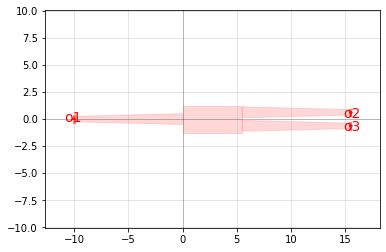

In [4]:
c = gf.components.mmi1x2()
c.plot()

2023-05-04 17:06:21.143 | WARNING  | gdsfactory.config:showwarning:60 - Casting complex values to real discards the imaginary part
/home/adolfofh/mambaforge/lib/python3.9/site-packages/meep/__init__.py:4445: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._get_epsilon_grid(gobj_list, mlist, _default_material, _ensure_periodicity, gv, cell_size, cell_center, nx, xtics, ny, ytics, nz, ztics, grid_vals, frequency)


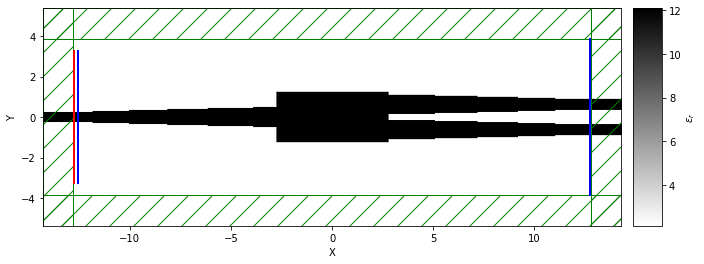

In [5]:
c = add_simulation_markers(c, port_source_offset=2)
sim_dict = gm.get_simulation(
        c,
        is_3d=False,
        resolution=20,
    )
fig = plt.figure(figsize=(12,4))
eps_parameters = {
    "interpolation": "spline36",
    "cmap": "binary",
    "alpha": 1.0,
    "contour": False,
    "contour_linewidth": 1,
    "frequency": None,
    "resolution": None,
    "colorbar": True,
}
mp.visualization.plot2D(
    sim_dict["sim"],
    eps_parameters=eps_parameters,
    )

In [6]:
sim = sim_dict["sim"]
#termination = [mp.stop_when_energy_decayed(dt=50, decay_by=1e-3)]
#sim.run(until_after_sources=termination)
sim.run(until=100)

2023-05-04 17:06:21.595 | WARNING  | gdsfactory.config:showwarning:60 - Casting complex values to real discards the imaginary part
/home/adolfofh/mambaforge/lib/python3.9/site-packages/meep/__init__.py:4439: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep.create_structure(cell_size, dft_data_list_, pml_1d_vols_, pml_2d_vols_, pml_3d_vols_, absorber_vols_, gv, br, sym, num_chunks, Courant, use_anisotropic_averaging, tol, maxeval, gobj_list, center, _ensure_periodicity, _default_material, alist, extra_materials, split_chunks_evenly, set_materials, existing_s, output_chunk_costs, my_bp)
2023-05-04 17:06:21.600 | WARNING  | gdsfactory.config:showwarning:60 - Casting complex values to real discards the imaginary part
/home/adolfofh/mambaforge/lib/python3.9/site-packages/meep/__init__.py:4442: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._set_materials(s, cell_size, gv, use_anisotropic_averaging, tol, maxe

FloatProgress(value=0.0, description='0% done ')

In [7]:
def field_func(x):
    return np.real(x)
field_parameters={
    "alpha": 0.8,
    "cmap": "jet",
    "interpolation": "none",
    "post_process": field_func,
    "colorbar":True,
}
monitor_parameters={
    "offset":30,
    "label_alpha":0.5,
    "label_color":'blue',
}
source_parameters={
    "offset":-20,
    "label_alpha":0.5,
    "label_color":'red',
}
colorbar_parameters={
    "label":'Field - Ez',
    "orientation":'vertical',
    "extend":'neither',
    "format":None,
    "position":'right',
    "size":'5%',
    "pad":'5%',
}

2023-05-04 17:06:30.078 | WARNING  | gdsfactory.config:showwarning:60 - The specified user volume is larger than the simulation domain and has been truncated.
/home/adolfofh/mambaforge/lib/python3.9/site-packages/meep/visualization.py:271: UserWarning: The specified user volume is larger than the simulation domain and has been truncated.
  warnings.warn(
2023-05-04 17:06:30.080 | WARNING  | gdsfactory.config:showwarning:60 - Casting complex values to real discards the imaginary part
/home/adolfofh/mambaforge/lib/python3.9/site-packages/meep/__init__.py:4445: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._get_epsilon_grid(gobj_list, mlist, _default_material, _ensure_periodicity, gv, cell_size, cell_center, nx, xtics, ny, ytics, nz, ztics, grid_vals, frequency)


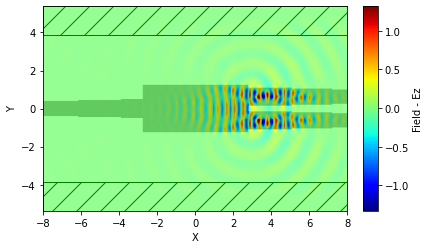

In [8]:
mp.visualization.plot2D(sim_dict["sim"],
    output_plane=mp.Volume(center=mp.Vector3(0,0,0), size=mp.Vector3(16,16,0)),
    labels='Teste',
    monitor_parameters=monitor_parameters,
    source_parameters=source_parameters,
    fields=mp.Ez,
    field_parameters=field_parameters,
    colorbar_parameters=colorbar_parameters)

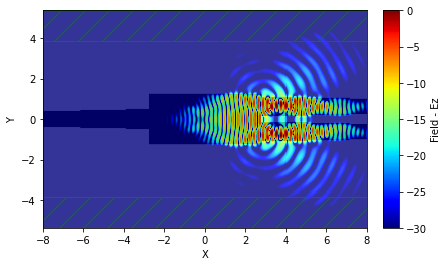

In [9]:
def field_func_dB(x):
    x_dB = 10*np.log10(x*np.conjugate(x))
    x_norm = x_dB - x_dB.max()
    x_norm[np.where(x_norm < -30)] = -30
    return x_norm

field_parameters={
    "alpha": 0.8,
    "cmap": "jet",
    "interpolation": "none",
    "post_process": field_func_dB,
    "colorbar":True,
}

colorbar_parameters={
    "label":'Field - Ez',
    "orientation":'vertical',
    "extend":'neither',
    "format":None,
    "position":'right',
    "size":'5%',
    "pad":'5%',
}

fig=plt.figure(figsize=(12,4))
sim.plot2D(
    output_plane=mp.Volume(center=mp.Vector3(0,0,0), size=mp.Vector3(16,16,0)),
    labels='Teste',
    monitor_parameters=monitor_parameters,
    source_parameters=source_parameters,
    fields=mp.Ez,
    field_parameters=field_parameters,
    colorbar_parameters=colorbar_parameters)